<a href="https://colab.research.google.com/github/Rahulhipparkar39667/Employee-Churn-Prediction-using-Ensemble-Learning-Techniques/blob/main/Employee_Churn_Prediction_using_Ensemble_Learning_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining Problem Statement and Analysing Basic Metrics


**Problem Statement:**

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

- Demographics (city, age, gender etc.)
- Tenure information (joining date, Last Date)
- Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

**Column Profiling**:

- MMMM-YY : Reporting Date (Monthly)
- Driver_ID : Unique id for drivers
- Age : Age of the driver
- Gender : Gender of the driver – Male : 0, Female: 1
- City : City Code of the driver
- Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
- Income : Monthly average Income of the driver
- Date Of Joining : Joining date for the driver
- LastWorkingDate : Last date of working for the driver
- Joining Designation : Designation of the driver at the time of joining
- Grade : Grade of the driver at the time of reporting
- Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
- Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

## Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualisation library
import seaborn as sns #data visualisation library built on the top of the matplotlib
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.express as px
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Importing Dataset

In [2]:
! gdown 11nX8gOQKKv0_X8qCDHUowOOU664w84NP

Downloading...
From: https://drive.google.com/uc?id=11nX8gOQKKv0_X8qCDHUowOOU664w84NP
To: /content/ola_driver_scaler.csv
100% 1.13M/1.13M [00:00<00:00, 76.5MB/s]


In [3]:
df=pd.read_csv('ola_driver_scaler.csv')
df

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

## Basic Analysis

### Shape of the data

In [5]:
df.shape

(19104, 13)

**Analysis**:

- Shape of dataframe is 19104 * 13
- Number of rows = 19104
- Number of columns = 13

### First 5 rows

In [6]:
df.head(5)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


### Columns in a dataframe

In [7]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

### Concise Summary

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


**Analysis**:

The columns 'Age', 'Gender', and 'LastWorkingDate' contain missing values.

### Statistical Summary

**Statistical Summary of numeric Columns**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,19104.0,1415.591133,8.107053e+02,1.0,710.0,1417.0,2137.0,2788.0
Age,19043.0,34.668435,6.257912e+00,21.0,30.0,34.0,39.0,58.0
Gender,19052.0,0.418749,4.933670e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,19104.0,1.021671,8.001671e-01,0.0,0.0,1.0,2.0,2.0
Income,19104.0,65652.025126,3.091452e+04,10747.0,42383.0,60087.0,83969.0,188418.0
Joining Designation,19104.0,1.690536,8.369837e-01,1.0,1.0,1.0,2.0,5.0
Grade,19104.0,2.252670,1.026512e+00,1.0,1.0,2.0,3.0,5.0
Total Business Value,19104.0,571662.074958,1.128312e+06,-6000000.0,0.0,250000.0,699700.0,33747720.0
Quarterly Rating,19104.0,2.008899,1.009832e+00,1.0,1.0,2.0,3.0,4.0


**Statistical Summary of Categorical Columns**

In [10]:
df.describe(include='object').T

,count,unique,top,freq
MMM-YY,19104,24,01/01/19,1022
City,19104,29,C20,1008
Dateofjoining,19104,869,23/07/15,192
LastWorkingDate,1616,493,29/07/20,70


### Missing Values in a Dataframe

In [11]:
(df.isnull().sum()/df.shape[0])*100

,0
MMM-YY,0.000000
Driver_ID,0.000000
Age,0.319305
Gender,0.272194
City,0.000000
Education_Level,0.000000
Income,0.000000
Dateofjoining,0.000000
LastWorkingDate,91.541039
Joining Designation,0.000000


**Analysis**:

The columns 'Age', 'Gender', and 'LastWorkingDate' contain missing values.

# Data Preprocessing

## Handling Missing Values

**Missing Values Check**

In [12]:
(df.isnull().sum()/df.shape[0])*100

,0
MMM-YY,0.000000
Driver_ID,0.000000
Age,0.319305
Gender,0.272194
City,0.000000
Education_Level,0.000000
Income,0.000000
Dateofjoining,0.000000
LastWorkingDate,91.541039
Joining Designation,0.000000


**Inference**:

The columns 'Age', 'Gender', and 'LastWorkingDate' contain missing values.

**Missing Values imputation using the KNN Algorithm**

In [13]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5,weights='uniform',metric='nan_euclidean')
df['Age']=imputer.fit_transform(df[['Age']])
df.isnull().sum()

,0
MMM-YY,0
Driver_ID,0
Age,0
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


**Categorical Columns imputation using the SimpleImputer**

In [14]:
from sklearn.impute import SimpleImputer
cat_imputer=SimpleImputer()
df['Gender']=cat_imputer.fit_transform(df[['Gender']])
df.isnull().sum()

,0
MMM-YY,0
Driver_ID,0
Age,0
Gender,0
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


In [15]:
df.isnull().sum()

,0
MMM-YY,0
Driver_ID,0
Age,0
Gender,0
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488
Joining Designation,0


**Inference**:
- There are no missing values in independent features .
- 'LastWorkingDate' is a target feature we will handle it later .

## Feature Engineering

### Data Aggregation at Driver level

**Group by based on the 'Driver_ID' and 'MMM-YY'**

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19104 non-null  float64
 3   Gender                19104 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [17]:
function_dict={
    'Age':'max',
    'Gender':'first',
    'City':'first',
    'Education_Level':'last',
    'Income':'last',
    'Dateofjoining':'last',
    'LastWorkingDate':'last',
    'Joining Designation':'last',
    'Grade':'last',
    'Total Business Value':'sum',
    'Quarterly Rating':'last'
}

df_new=df.groupby(['Driver_ID','MMM-YY']).aggregate(function_dict)

In [18]:
df_new

Age  Gender City  Education_Level  Income Dateofjoining  \
Driver_ID MMM-YY                                                               
1         01/01/19  28.0     0.0  C23                2   57387      24/12/18   
          02/01/19  28.0     0.0  C23                2   57387      24/12/18   
          03/01/19  28.0     0.0  C23                2   57387      24/12/18   
2         11/01/20  31.0     0.0   C7                2   67016      11/06/20   
          12/01/20  31.0     0.0   C7                2   67016      11/06/20   
...                  ...     ...  ...              ...     ...           ...   
2788      08/01/20  30.0     0.0  C27                2   70254      06/08/20   
          09/01/20  30.0     0.0  C27                2   70254      06/08/20   
          10/01/20  30.0     0.0  C27                2   70254      06/08/20   
          11/01/20  30.0     0.0  C27                2   70254      06/08/20   
          12/01/20  30.0     0.0  C27                2   70254      06/08/20   

                   LastWorkingDate  Joining Designation  Grade  \
Driver_ID MMM-YY                                                 
1         01/01/19            None                    1      1   
          02/01/19            None                    1      1   
          03/01/19        03/11/19                    1      1   
2         11/01/20            None                    2      2   
          12/01/20            None                    2      2   
...                            ...                  ...    ...   
2788      08/01/20            None                    2      2   
          09/01/20            None                    2      2   
          10/01/20            None                    2      2   
          11/01/20            None                    2      2   
          12/01/20            None                    2      2   

                    Total Business Value  Quarterly Rating  
Driver_ID MMM-YY                                            
1         01/01/19               2381060                 2  
          02/01/19               -665480                 2  
          03/01/19                     0                 2  
2         11/01/20                     0                 1  
          12/01/20                     0                 1  
...                                  ...               ...  
2788      08/01/20                740280                 3  
          09/01/20                448370                 3  
          10/01/20                     0                 2  
          11/01/20                200420                 2  
          12/01/20                411480                 2  

[19104 rows x 11 columns]

**Data Aggregation at driver-level**

In [19]:
df1=pd.DataFrame()
df1

""


In [20]:
df1['Driver_ID']=df['Driver_ID'].unique()
df1

,Driver_ID
0,1
1,2
2,4
3,5
4,6
...,...
2376,2784
2377,2785
2378,2786
2379,2787


In [21]:
df.columns

Index(['MMM-YY', 'Driver_ID', 'Age', 'Gender', 'City', 'Education_Level',
       'Income', 'Dateofjoining', 'LastWorkingDate', 'Joining Designation',
       'Grade', 'Total Business Value', 'Quarterly Rating'],
      dtype='object')

In [22]:
df1['Age']=list(df.groupby('Driver_ID').agg({'Age':'max'})['Age'])
df1['Gender']=list(df.groupby('Driver_ID').agg({'Gender':'last'})['Gender'])
df1['City']=list(df.groupby('Driver_ID').agg({'City':'last'})['City'])
df1['Education']=list(df.groupby('Driver_ID').agg({'Education_Level':'last'})['Education_Level'])
df1['Income']=list(df.groupby('Driver_ID').agg({'Income':'last'})['Income'])
df1['Joining_Designation']=list(df.groupby('Driver_ID').agg({'Joining Designation':'last'})['Joining Designation'])
df1['Grade']=list(df.groupby('Driver_ID').agg({'Grade':'last'})['Grade'])
df1['Total_Business_Value']=list(df.groupby('Driver_ID').agg({'Total Business Value':'sum'})['Total Business Value'])
df1['Last_Quarterly_Rating']=list(df.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating'])
df1

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating
0,1,28.0,0.0,C23,2,57387,1,1,1715580,2
1,2,31.0,0.0,C7,2,67016,2,2,0,1
2,4,43.0,0.0,C13,2,65603,2,2,350000,1
3,5,29.0,0.0,C9,0,46368,1,1,120360,1
4,6,31.0,1.0,C11,1,78728,3,3,1265000,2
...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0,82815,2,3,21748820,4
2377,2785,34.0,1.0,C9,0,12105,1,1,0,1
2378,2786,45.0,0.0,C19,0,35370,2,2,2815090,1
2379,2787,28.0,1.0,C20,2,69498,1,1,977830,1


### Creating a column which tells if the quarterly rating has increased for that employee

**For the employee whose quarterly rating has increased we assign 1**

In [23]:
# Quarterly rating at begining
qrf=df.groupby('Driver_ID').agg({'Quarterly Rating':'first'})

#Quarterly rating at last
qrl = df.groupby('Driver_ID').agg({'Quarterly Rating':'last'})

#Return the ids of driver for whom the rating has increased
qr = (qrl['Quarterly Rating']>qrf['Quarterly Rating']).reset_index()
emp_id=qr[qr['Quarterly Rating']==True]['Driver_ID']
emp_id

# Create new column in  the dataframe that indicates the increase in the Quarterly Rating
qri=[]
for i in df1['Driver_ID']:
    if i in emp_id.values:
        qri.append(1)
    else:
        qri.append(0)
df1['Quarterly_Rating_Increased']=qri



In [24]:
df1

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased
0,1,28.0,0.0,C23,2,57387,1,1,1715580,2,0
1,2,31.0,0.0,C7,2,67016,2,2,0,1,0
2,4,43.0,0.0,C13,2,65603,2,2,350000,1,0
3,5,29.0,0.0,C9,0,46368,1,1,120360,1,0
4,6,31.0,1.0,C11,1,78728,3,3,1265000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0,82815,2,3,21748820,4,1
2377,2785,34.0,1.0,C9,0,12105,1,1,0,1,0
2378,2786,45.0,0.0,C19,0,35370,2,2,2815090,1,0
2379,2787,28.0,1.0,C20,2,69498,1,1,977830,1,0


In [25]:
df1['Quarterly_Rating_Increased'].value_counts()

,count
Quarterly_Rating_Increased,
0,2023
1,358


### Creating a column which tells if the monthly income has increased for that employee

**For the employee whose monthly income has increased we assign 1**

In [26]:
# Intial Income
sf=df.groupby('Driver_ID').agg({'Income':'first'}).reset_index()

# Create new column that indicates increased in the income
df1['Income_Increased']=np.where(df1['Income'] > sf['Income'],1,0)



In [27]:
df1

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Income_Increased
0,1,28.0,0.0,C23,2,57387,1,1,1715580,2,0,0
1,2,31.0,0.0,C7,2,67016,2,2,0,1,0,0
2,4,43.0,0.0,C13,2,65603,2,2,350000,1,0,0
3,5,29.0,0.0,C9,0,46368,1,1,120360,1,0,0
4,6,31.0,1.0,C11,1,78728,3,3,1265000,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0,82815,2,3,21748820,4,1,0
2377,2785,34.0,1.0,C9,0,12105,1,1,0,1,0,0
2378,2786,45.0,0.0,C19,0,35370,2,2,2815090,1,0,0
2379,2787,28.0,1.0,C20,2,69498,1,1,977830,1,0,0


In [28]:
df1['Income_Increased'].value_counts()

,count
Income_Increased,
0,2338
1,43


### Target Column Creation

**Employees having last working date will be assign the value 1**

In [29]:
lwr=(df.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'].isna()).reset_index()

# Return the driver ids having last working date
emp_id=lwr[lwr['LastWorkingDate']==True]['Driver_ID']

#Create target column
target=[]
for id in df1['Driver_ID']:
    if id in emp_id.values:
        target.append(0)
    else:
        target.append(1)
df1['Target']=target

In [30]:
df1

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Income_Increased,Target
0,1,28.0,0.0,C23,2,57387,1,1,1715580,2,0,0,1
1,2,31.0,0.0,C7,2,67016,2,2,0,1,0,0,0
2,4,43.0,0.0,C13,2,65603,2,2,350000,1,0,0,1
3,5,29.0,0.0,C9,0,46368,1,1,120360,1,0,0,1
4,6,31.0,1.0,C11,1,78728,3,3,1265000,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0,82815,2,3,21748820,4,1,0,0
2377,2785,34.0,1.0,C9,0,12105,1,1,0,1,0,0,1
2378,2786,45.0,0.0,C19,0,35370,2,2,2815090,1,0,0,1
2379,2787,28.0,1.0,C20,2,69498,1,1,977830,1,0,0,1


# EDA

In [31]:
data = df1.copy()
data.head()

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Income_Increased,Target
0,1,28.0,0.0,C23,2,57387,1,1,1715580,2,0,0,1
1,2,31.0,0.0,C7,2,67016,2,2,0,1,0,0,0
2,4,43.0,0.0,C13,2,65603,2,2,350000,1,0,0,1
3,5,29.0,0.0,C9,0,46368,1,1,120360,1,0,0,1
4,6,31.0,1.0,C11,1,78728,3,3,1265000,2,1,0,0


## Statistical Summary

In [32]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.380432e+01,5.909102e+00,21.0,30.0,33.0,37.0,58.0
Gender,2381.0,4.104105e-01,4.909712e-01,0.0,0.0,0.0,1.0,1.0
Education,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Income,2381.0,5.933416e+04,2.838367e+04,10747.0,39104.0,55315.0,75986.0,188418.0
Joining_Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total_Business_Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Last_Quarterly_Rating,2381.0,1.427971e+00,8.098389e-01,1.0,1.0,1.0,2.0,4.0
Quarterly_Rating_Increased,2381.0,1.503570e-01,3.574961e-01,0.0,0.0,0.0,0.0,1.0


**Insights**:

- There are 2381 employees in the dataset.
- The minimum age of the employee in the data is 21 years and the maximum age is 58 years.
- 75% of the employees have their monthly income less than or equal to 75,986 units.
- 50% of the employees have acquired 8,17,680 as the their total business value.

## Univariate Analysis

### Distribution of Target Variable

In [33]:
# Create pie chart
colors=['#b9e769','#ef476f']
pie_chart = go.Figure(go.Pie(labels=['Churn','Not Churn'], values=data['Target'].value_counts()))
pie_chart.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

# Create bar chart
labels = ['Churn','Not Churn']
bar_chart = go.Figure(go.Bar(x=labels, y=data['Target'].value_counts(),
                              marker_color=colors))

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, column_widths=[0.5, 0.5], specs=[[{"type": "bar"}, {"type": "pie"}]],
                       subplot_titles=("Bar Chart", "Pie Chart"))

# Add charts to subplots

fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# Update layout
fig.update_layout(showlegend=False,title_text="Distribution of Target Variable",
                xaxis=dict(title='Target',titlefont_size=16,tickfont_size=14,),
                yaxis=dict(title='Number of employees',titlefont_size=16,tickfont_size=14,))

# Show subplots
fig.show()


**Insights**

- 68% of the employees have left the organization.
- 32% of the employees are still part of the organization.

### Distribution of Gender among Employees

In [34]:
colors=['#89A1EF', '#EF9CDA', '#eac8ca', '#0066ff', '#ff00ff']
labels=data['Gender'].value_counts().index

# Create pie chart

pie_chart = go.Figure(go.Pie(labels=labels, values=data['Gender'].value_counts()))
pie_chart.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

# Create bar chart
bar_chart = go.Figure(go.Bar(x=labels, y=data['Gender'].value_counts(),
                              marker_color=colors))

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, column_widths=[0.5, 0.5], specs=[[{"type": "bar"}, {"type": "pie"}]],
                       subplot_titles=("Bar Chart", "Pie Chart"))

# Add charts to subplots

fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# Update layout
fig.update_layout(showlegend=False,title_text="Distribution of Gender among Employees",
                xaxis=dict(title='Gender',titlefont_size=16,tickfont_size=14,),
                yaxis=dict(title='Number of employees',titlefont_size=16,tickfont_size=14,))

# Show subplots
fig.show()


**Insights**

- 59% of the employees are male, while 41% are female.

### Distribution of Age-groups

In [35]:
data['Age_Group']=pd.cut(data['Age'],bins=[20,35,50,65],labels=['21-35','36-50','51-65'])
data

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Income_Increased,Target,Age_Group
0,1,28.0,0.0,C23,2,57387,1,1,1715580,2,0,0,1,21-35
1,2,31.0,0.0,C7,2,67016,2,2,0,1,0,0,0,21-35
2,4,43.0,0.0,C13,2,65603,2,2,350000,1,0,0,1,36-50
3,5,29.0,0.0,C9,0,46368,1,1,120360,1,0,0,1,21-35
4,6,31.0,1.0,C11,1,78728,3,3,1265000,2,1,0,0,21-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0,82815,2,3,21748820,4,1,0,0,21-35
2377,2785,34.0,1.0,C9,0,12105,1,1,0,1,0,0,1,21-35
2378,2786,45.0,0.0,C19,0,35370,2,2,2815090,1,0,0,1,36-50
2379,2787,28.0,1.0,C20,2,69498,1,1,977830,1,0,0,1,21-35


In [36]:
colors=['#BC9EC1', '#E3BAC6', '#FDE8E9']
labels=data['Age_Group'].value_counts().index

# Create pie chart

pie_chart = go.Figure(go.Pie(labels=labels, values=data['Age_Group'].value_counts()))
pie_chart.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

# Create bar chart
bar_chart = go.Figure(go.Bar(x=labels, y=data['Age_Group'].value_counts(),
                              marker_color=colors))

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, column_widths=[0.5, 0.5], specs=[[{"type": "bar"}, {"type": "pie"}]],
                       subplot_titles=("Bar Chart", "Pie Chart"))

# Add charts to subplots

fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# Update layout
fig.update_layout(showlegend=False,title_text="Distribution of Age among Employees",
                xaxis=dict(title='Age-Groups',titlefont_size=16,tickfont_size=14,),
                yaxis=dict(title='Number of employees',titlefont_size=16,tickfont_size=14,))

# Show subplots
fig.show()

**Insights**:

Approximately 65.2% of the employees fall within the young age group (21-35 years), while 34% belong to the middle-aged group (36-50 years). A smaller proportion, 0.84%, comprises older employees aged 51-65 years.

### Distribution of Income

In [37]:
data['Income_Group']=pd.cut(data['Income'],
                            bins=[10000,40000,70000,100000,130000,160000,190000],
                            labels = ["10,000 - 39,999", "40,000 - 69,999", "70,000 - 99,999", "100,000 - 129,999", "130,000 - 159,999", "160,000 - 189,999"]

)
data

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Income_Increased,Target,Age_Group,Income_Group
0,1,28.0,0.0,C23,2,57387,1,1,1715580,2,0,0,1,21-35,"40,000 - 69,999"
1,2,31.0,0.0,C7,2,67016,2,2,0,1,0,0,0,21-35,"40,000 - 69,999"
2,4,43.0,0.0,C13,2,65603,2,2,350000,1,0,0,1,36-50,"40,000 - 69,999"
3,5,29.0,0.0,C9,0,46368,1,1,120360,1,0,0,1,21-35,"40,000 - 69,999"
4,6,31.0,1.0,C11,1,78728,3,3,1265000,2,1,0,0,21-35,"70,000 - 99,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0,82815,2,3,21748820,4,1,0,0,21-35,"70,000 - 99,999"
2377,2785,34.0,1.0,C9,0,12105,1,1,0,1,0,0,1,21-35,"10,000 - 39,999"
2378,2786,45.0,0.0,C19,0,35370,2,2,2815090,1,0,0,1,36-50,"10,000 - 39,999"
2379,2787,28.0,1.0,C20,2,69498,1,1,977830,1,0,0,1,21-35,"40,000 - 69,999"


In [38]:
colors=["#2c699a", "#048ba8","#0db39e","#83e377","#b9e769","#efea5a","#f1c453"]
labels=data['Income_Group'].value_counts().index

# Create pie chart

pie_chart = go.Figure(go.Pie(labels=labels, values=data['Income_Group'].value_counts()))
pie_chart.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

# Create bar chart
bar_chart = go.Figure(go.Bar(x=labels, y=data['Income_Group'].value_counts(),
                              marker_color=colors))

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, column_widths=[0.5, 0.5], specs=[[{"type": "bar"}, {"type": "pie"}]],
                       subplot_titles=("Bar Chart", "Pie Chart"))

# Add charts to subplots

fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# Update layout
fig.update_layout(showlegend=False,title_text="Distribution of Income",
                xaxis=dict(title='Income-Groups',titlefont_size=16,tickfont_size=14,),
                yaxis=dict(title='Number of employees',titlefont_size=16,tickfont_size=14,))

# Show subplots
fig.show()

**Insights**
- 43.2% of employees have an income between 40,000 and 69,999.
- 26.5% of employees have an income between 10,000 and 39,999.
- 20.6% of employees have an income between 70,000 and 99,999.
- 7.39% of employees have an income between 100,000 and 129,999.
- Approximately 2.2% of employees have an income greater than 160,000.


### How many employees got hike in there salaries?

In [39]:
colors=['#485696','#F9C784']
labels=data['Income_Increased'].value_counts().index

# Create pie chart

pie_chart = go.Figure(go.Pie(labels=labels, values=data['Income_Increased'].value_counts()))
pie_chart.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

# Create bar chart
bar_chart = go.Figure(go.Bar(x=labels, y=data['Income_Increased'].value_counts(),
                              marker_color=colors))

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, column_widths=[0.5, 0.5], specs=[[{"type": "bar"}, {"type": "pie"}]])

# Add charts to subplots

fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# Update layout
fig.update_layout(showlegend=False,title_text="Analysis of Increase in Income Among Employees",
                xaxis=dict(title='Income Increased',titlefont_size=16,tickfont_size=14,),
                yaxis=dict(title='Number of employees',titlefont_size=16,tickfont_size=14,))

# Show subplots
fig.show()

**Insights**:

Only 1.81% of employees received a salary hike, while 98.2% did not experience any increase in salary. This lack of increments could be a significant factor contributing to employees leaving the company.

### How many employees received an increase in their quarterly ratings?

In [40]:
colors=['#A6B1E1','#DCD6F7']
labels=data['Quarterly_Rating_Increased'].value_counts().index

# Create pie chart

pie_chart = go.Figure(go.Pie(labels=labels, values=data['Quarterly_Rating_Increased'].value_counts()))
pie_chart.update_traces(hoverinfo='label+value', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

# Create bar chart
bar_chart = go.Figure(go.Bar(x=labels, y=data['Quarterly_Rating_Increased'].value_counts(),
                              marker_color=colors))

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, column_widths=[0.5, 0.5], specs=[[{"type": "bar"}, {"type": "pie"}]])

# Add charts to subplots

fig.add_trace(bar_chart.data[0], row=1, col=1)
fig.add_trace(pie_chart.data[0], row=1, col=2)

# Update layout
fig.update_layout(showlegend=False,title_text="Analysis of Increase in Quarterly Ratings",
                xaxis=dict(title='Quarterly Rating Increased',titlefont_size=16,tickfont_size=14,),
                yaxis=dict(title='Number of employees',titlefont_size=16,tickfont_size=14,))

# Show subplots
fig.show()

**Insights**

85% of employees did not receive any increase in their quarterly ratings, while 15% experienced an increase in their quarterly ratings.

### Distribution of City, Education, Grade and Joining Designation

In [41]:
def add_percentage_labels(ax):
    total = data.shape[0]  # Total number of employees
    for container in ax.containers:
        labels = [f'{(h / total):.1%}' for h in container.datavalues]
        ax.bar_label(container, labels=labels, label_type='edge',fontsize=12)

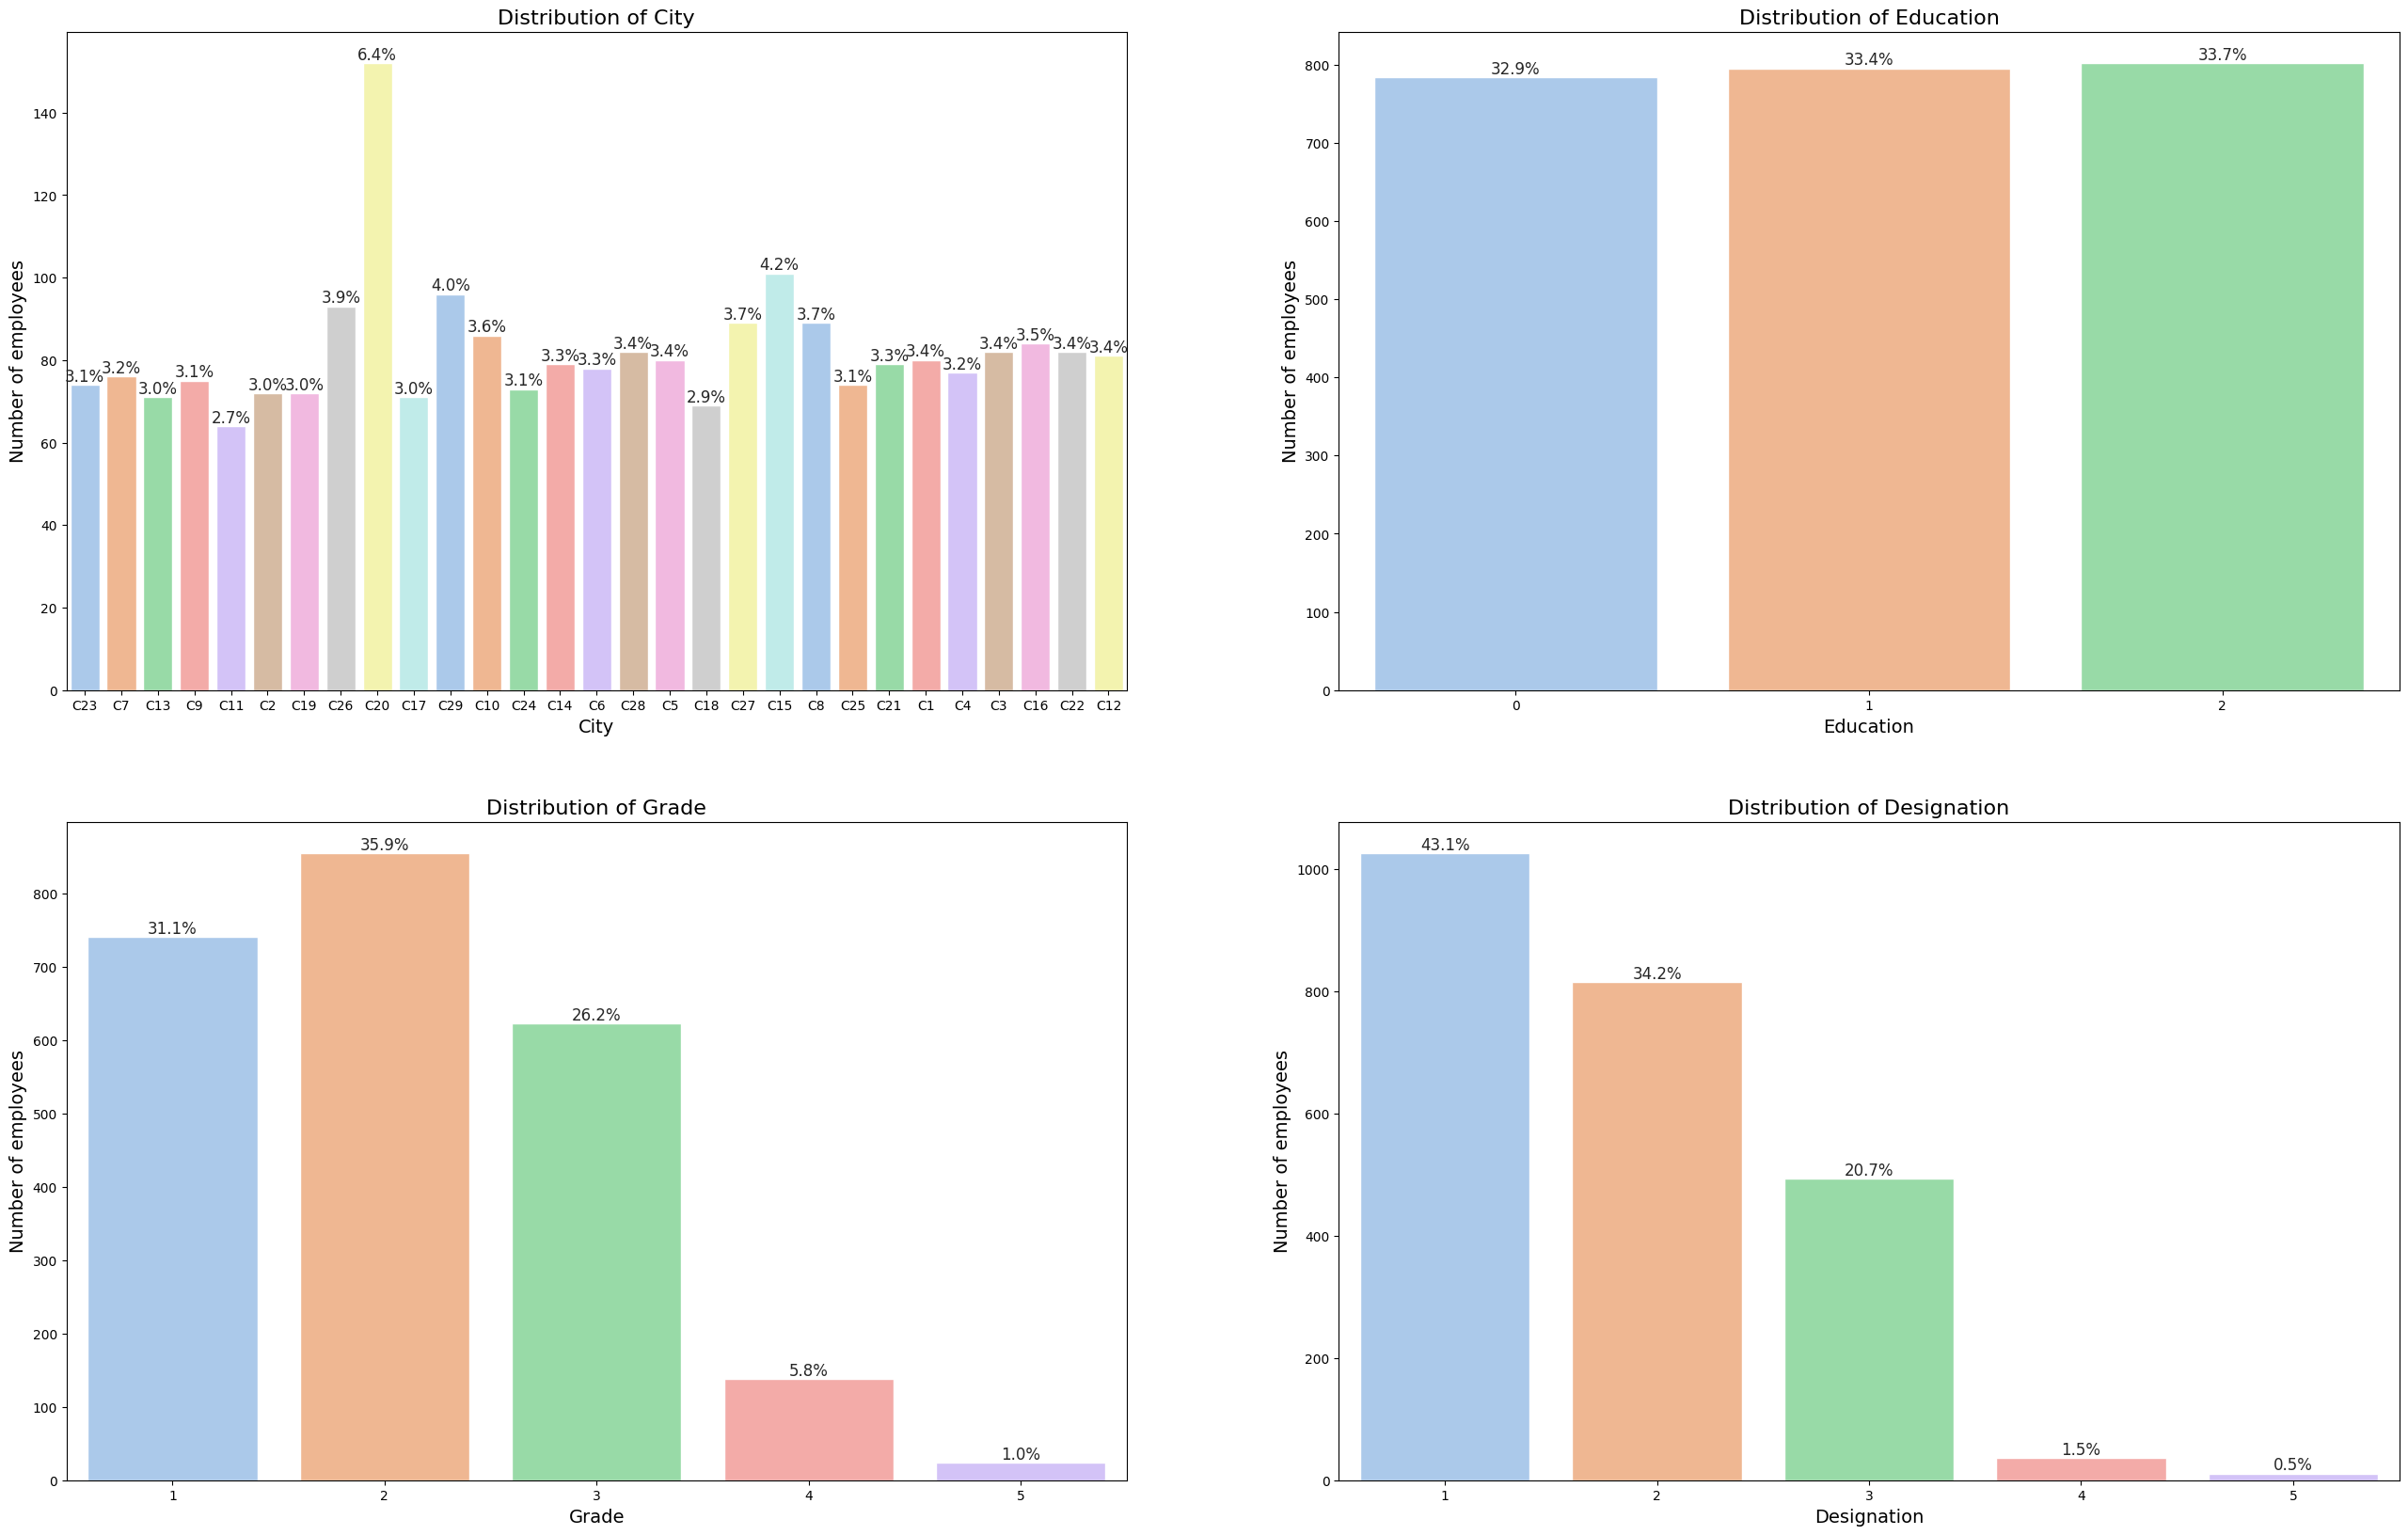

In [42]:
fig,ax=plt.subplots(2,2,figsize=(32,20))
sns.set_style('darkgrid')
#count plot for City
sns.countplot(data=data,x='City',palette='pastel',ax=ax[0,0])
ax[0,0].set_xlabel('City',fontdict=dict(fontsize=14))
ax[0,0].set_ylabel('Number of employees',fontdict=dict(fontsize=14))
ax[0,0].set_title('Distribution of City',fontdict=dict(fontsize=16))
add_percentage_labels(ax[0,0])
fig.show()

#count plot for Education
sns.countplot(data=data,x='Education',palette='pastel',ax=ax[0,1])
ax[0,1].set_xlabel('Education',fontdict=dict(fontsize=14))
ax[0,1].set_ylabel('Number of employees',fontdict=dict(fontsize=14))
ax[0,1].set_title('Distribution of Education',fontdict=dict(fontsize=16))
add_percentage_labels(ax[0,1])
fig.show()

#countplot for Grade
sns.countplot(data=data,x='Grade',palette='pastel',ax=ax[1,0])
ax[1,0].set_xlabel('Grade',fontdict=dict(fontsize=14))
ax[1,0].set_ylabel('Number of employees',fontdict=dict(fontsize=14))
ax[1,0].set_title('Distribution of Grade',fontdict=dict(fontsize=16))
add_percentage_labels(ax[1,0])
fig.show()

#countplot for Designation
sns.countplot(data=data,x='Joining_Designation',palette='pastel',ax=ax[1,1])
ax[1,1].set_xlabel('Designation',fontdict=dict(fontsize=14))
ax[1,1].set_ylabel('Number of employees',fontdict=dict(fontsize=14))
ax[1,1].set_title('Distribution of Designation',fontdict=dict(fontsize=16))
add_percentage_labels(ax[1,1])
fig.show()

**Insights**:
- Approximately 6.4% of employees are from city C20, while 4.2% are from city C15.
- The proportion of employees who have completed 12th grade and those who have graduated is the same.
- 36% of employees belong to grade 2, 31.1% belong to grade 1, 26.2% belong to grade 3, and the remaining employees belong to grades 4 and 5.
- 43.1% of employees joined at designation 1, 34.2% at designation 2, 20.7% at designation 3, and the remaining employees at designations 4 and 5.

### Distribution of the total business value

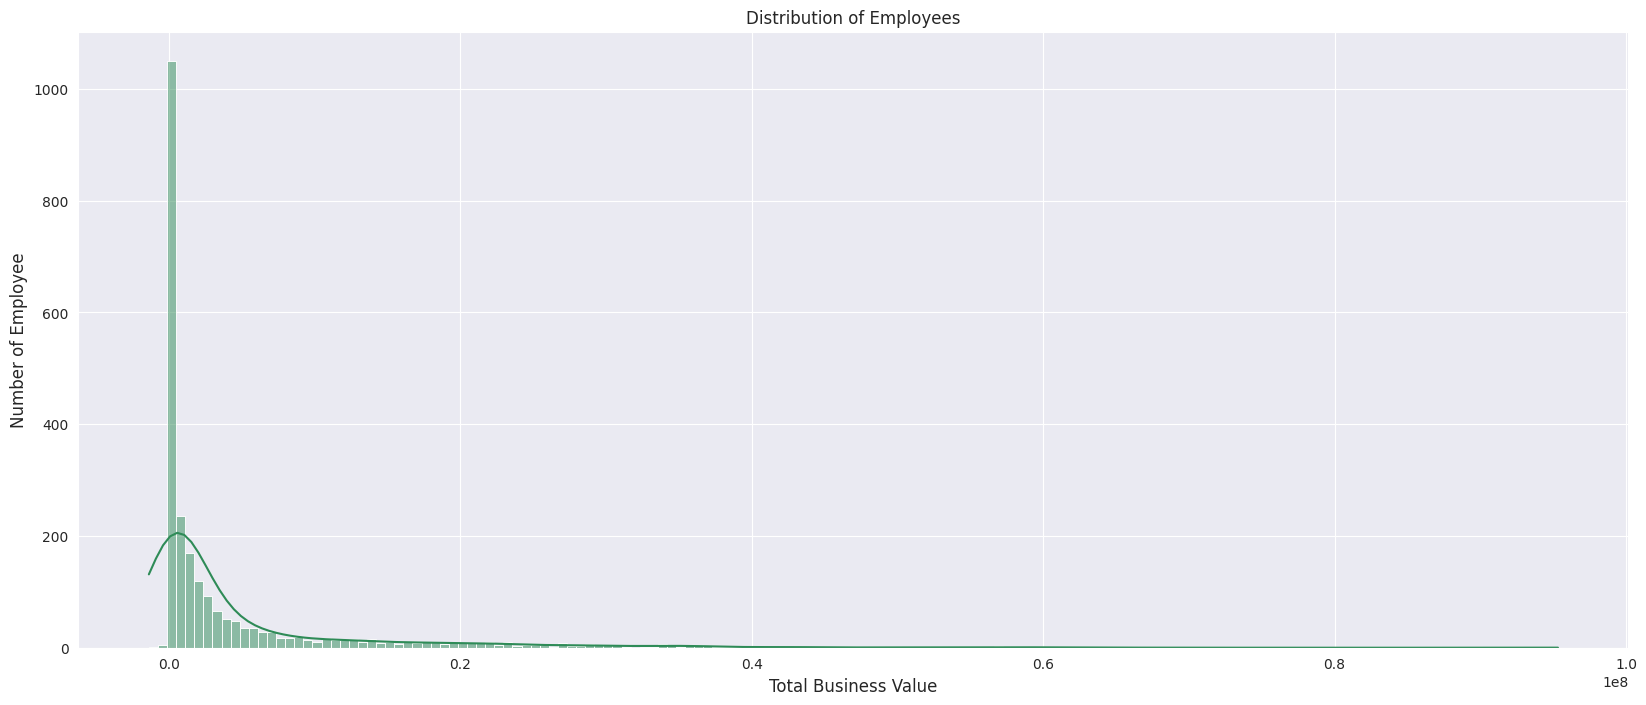

In [43]:
plt.figure(figsize=(20,8))
sns.histplot(data=data,x='Total_Business_Value',kde=True,color='seagreen')
plt.xlabel('Total Business Value',fontsize=12)
plt.ylabel('Number of Employee',fontsize=12)
plt.title('Distribution of Employees')
plt.show()

**Inference**:

The distribution of total business value is right-skewed, indicating the presence of outliers in this feature.

## Bivariate Analysis

### Impact of Gender on the Employee Churn

In [44]:
# Create the stacked bar chart
# Count the occurrences
gender_target_counts = data.groupby(['Gender', 'Target']).size().unstack(fill_value=0)

# Normalize the values to get percentages
gender_target_percentages = gender_target_counts.div(gender_target_counts.sum(axis=1), axis=0) * 100


# Create the bar chart
fig = go.Figure()

# Add Male bars
fig.add_trace(go.Bar(
    x=gender_target_counts.index,
    y=gender_target_percentages[0],
    name='Not Churned',
    marker_color='#1466FF',
))

# Add Female bars
fig.add_trace(go.Bar(
    x=gender_target_counts.index,
    y=gender_target_percentages[1],
    name='Churned',
    marker_color='#FF9505',
))

# Update layout
fig.update_layout(
    barmode='stack',
    title='Impact of Gender on Employee Churn',
    xaxis=dict(title='Gender', titlefont_size=16, tickfont_size=14),
    yaxis=dict(title='Percent of Employees', titlefont_size=16, tickfont_size=14),
    legend_title_text='Target'
)

# Show plot
fig.show()

**Insights:**
- 32.5% of male employees are still working, while 67.5% have left the company.
- 31.4% of female employees have not churned, whereas 68.5% have been churned

**Overall Trends**:
- The data highlights a similar trend of higher churn rates for both male and female employees, with a slightly higher churn rate among female employees. This suggests that employee retention strategies may need to be tailored to address specific issues faced by different gender groups to improve overall retention rates.

### Impact of the Age on the Employee Churn

In [45]:
# Count Occurrences
age_target_counts = data.groupby(['Age_Group', 'Target']).size().unstack(fill_value=0)

# Normalize the values to get percentages
age_target_percentages = age_target_counts.div(age_target_counts.sum(axis=1), axis=0) * 100

# Create the bar charts

fig=go.Figure()

# Not Churned Bars
fig.add_trace(go.Bar(
    x=age_target_counts.index,
    y=age_target_percentages[0],
    name='Not Churned',
    marker_color='#1466FF',
))

# Churned Bars
fig.add_trace(go.Bar(
    x=age_target_counts.index,
    y=age_target_percentages[1],
    name='Churned',
    marker_color='#FF9505',
))

# Update layout
fig.update_layout(
    barmode='stack',
    title='Impact of Age-Group on Employee Churn',
    xaxis=dict(title='Age-Group', titlefont_size=16, tickfont_size=14),
    yaxis=dict(title='Percent of Employees', titlefont_size=16, tickfont_size=14),
    legend_title_text='Target'
)

# Show plot
fig.show()




**Insights:**
- For the 21-35 age group, 29.6% of employees have not churned, while 70.4% have left the company.
- Among employees aged 36-50, 37% are still with the company, whereas 63% have churned.
- In the 51-65 age group, 30% of employees remain loyal and continue to work, while 70% have already churned.

**Overall Trends**:
- The data indicates that the highest churn rates are seen in the 21-35 and 51-65 age groups, both with 70% of employees having left the company.
- The 36-50 age group shows a slightly lower churn rate at 63%, suggesting that employees in this middle age range may have more stability or job satisfaction.

### Impact of Income on the Employee Churn

In [46]:
# Count Occurrences
income_target_counts = data.groupby(['Income_Group', 'Target']).size().unstack(fill_value=0)

# Normalize the values to get percentages
income_target_percentages = income_target_counts.div(income_target_counts.sum(axis=1), axis=0) * 100

# Create the bar charts

fig=go.Figure()

# Not Churned Bars
fig.add_trace(go.Bar(
    x=income_target_counts.index,
    y=income_target_percentages[0],
    name='Not Churned',
    marker_color='#1466FF',
))

# Churned Bars
fig.add_trace(go.Bar(
    x=income_target_counts.index,
    y=income_target_percentages[1],
    name='Churned',
    marker_color='#FF9505',
))

# Update layout
fig.update_layout(
    barmode='stack',
    title='Impact of Income on Employee Churn',
    xaxis=dict(title='Income-Group', titlefont_size=16, tickfont_size=14),
    yaxis=dict(title='Percent of Employees', titlefont_size=16, tickfont_size=14),
    legend_title_text='Target'
)

# Show plot
fig.show()




**Insights**:

- Employees earning between 10k - 39k are highly likely to churn, with 79% having left the company, while only 21% are still working.
- For those with a salary between 40k - 70k, there is a 70% chance they will leave the company, with only 30% remaining.
- Among employees earning 70k - 129,999, 56% have churned, while 44% are still employed.
- In the salary range of 130k - 160k, 44% of employees have left, whereas 56% continue to work.
- Employees with salaries above 160k are less likely to churn, with only 33% having left the company and the remaining 67% still working.

**Overall Trends**:
- Lower salary ranges (10k - 70k) show a higher likelihood of churn, with percentages as high as 79%.
- Mid-range salaries (70k - 160k) exhibit more balanced churn rates, with a slight tendency for employees to stay.
- Higher salaries (above 160k) demonstrate the lowest churn rates, indicating better retention among higher-paid employees.

### Impact of Salary Increase on Employee Churn


In [47]:
# Count Occurrences
hike_target_counts = data.groupby(['Income_Increased', 'Target']).size().unstack(fill_value=0)

# Normalize the values to get percentages
hike_target_percentages = hike_target_counts.div(hike_target_counts.sum(axis=1), axis=0) * 100

# Create the bar charts

fig=go.Figure()

# Not Churned Bars
fig.add_trace(go.Bar(
    x=hike_target_counts.index,
    y=hike_target_percentages[0],
    name='Not Churned',
    marker_color='#1466FF',
))

# Churned Bars
fig.add_trace(go.Bar(
    x=hike_target_counts.index,
    y=hike_target_percentages[1],
    name='Churned',
    marker_color='#FF9505',
))

# Update layout
fig.update_layout(
    barmode='stack',
    title='Impact of Salary Increase on Employee Churn',
    xaxis=dict(title='Income Increased', titlefont_size=16, tickfont_size=14),
    yaxis=dict(title='Percent of Employees', titlefont_size=16, tickfont_size=14),
    legend_title_text='Target'
)

# Show plot
fig.show()




**Insights**
- Employees with Salary Hikes:

  - 93% of employees who received a salary hike have not churned.
  - Only 7% of employees with a salary hike have left the company.

- Employees without Salary Increases:

  - 68% of employees who did not receive a salary increase have churned.
  - 31% of employees without a salary increase remain with the company.

**Overall Trend**:

Salary increases significantly reduce churn rates. Among employees who receive salary hikes, only 7% have left the company, indicating high retention. Conversely, employees who do not receive salary increases have a much higher churn rate of 68%, highlighting the importance of salary increments in maintaining employee loyalty and reducing turnover.

### Impact of Quarterly Rating on Employee Churn

In [48]:
# Count Occurrences
qr_target_counts = data.groupby(['Quarterly_Rating_Increased', 'Target']).size().unstack(fill_value=0)

# Normalize the values to get percentages
qr_target_percentages = qr_target_counts.div(qr_target_counts.sum(axis=1), axis=0) * 100

# Create the bar charts

fig=go.Figure()

# Not Churned Bars
fig.add_trace(go.Bar(
    x=qr_target_counts.index,
    y=qr_target_percentages[0],
    name='Not Churned',
    marker_color='#1466FF',
))

# Churned Bars
fig.add_trace(go.Bar(
    x=qr_target_counts.index,
    y=qr_target_percentages[1],
    name='Churned',
    marker_color='#FF9505',
))

# Update layout
fig.update_layout(
    barmode='stack',
    title='Impact of Quarterly Rating Increase on Employee Churn',
    xaxis=dict(title='Quarterly Rating Increased', titlefont_size=16, tickfont_size=14),
    yaxis=dict(title='Percent of Employees', titlefont_size=16, tickfont_size=14),
    legend_title_text='Target'
)

# Show plot
fig.show()


**Insights**

- Employees with an Increase in Quarterly Rating:
    - 77% are not churned.
    - 23% are churned.

- Employees without an Increase in Quarterly Rating:
  - 24% are not churned.
  - 75% are churned.

**Overall Trend**:

The data indicates a strong correlation between receiving an increase in quarterly rating and employee retention. Employees who received a quarterly rating increase are significantly more likely to stay with the organization compared to those who did not receive an increase.

### Impact of Business Value on Employee Churn

In [49]:
m1= round(data['Total_Business_Value'].min())
m2= round(data['Total_Business_Value'].max())
bins=[m1,30000000, 65000000,m2]
labels=['Low','Medium','High']
data['Business_Value_Grp']=pd.cut(data['Total_Business_Value'],bins=bins,labels=labels)
data['Business_Value_Grp']

,Business_Value_Grp
0,Low
1,Low
2,Low
3,Low
4,Low
...,...
2376,Low
2377,Low
2378,Low
2379,Low


In [50]:
# Count Occurrences
bv_target_counts = data.groupby(['Business_Value_Grp', 'Target']).size().unstack(fill_value=0)

# Normalize the values to get percentages
bv_target_percentages = bv_target_counts.div(bv_target_counts.sum(axis=1), axis=0) * 100

# Create the bar charts

fig=go.Figure()

# Not Churned Bars
fig.add_trace(go.Bar(
    x=bv_target_counts.index,
    y=bv_target_percentages[0],
    name='Not Churned',
    marker_color='#1466FF',
))

# Churned Bars
fig.add_trace(go.Bar(
    x=bv_target_counts.index,
    y=bv_target_percentages[1],
    name='Churned',
    marker_color='#FF9505',
))

# Update layout
fig.update_layout(
    barmode='stack',
    title='Impact of Business Value on Employee Churn',
    xaxis=dict(title='Business Value Group', titlefont_size=16, tickfont_size=14),
    yaxis=dict(title='Percent of Employees', titlefont_size=16, tickfont_size=14),
    legend_title_text='Target'
)

# Show plot
fig.show()


**Insights**:

- Low Business Value: 69% of employees with low business value are likely to leave the organization, while 30% will continue working.
- Medium Business Value: 89% of employees with medium business value will remain with the organization, whereas 11% are likely to leave.
- High Business Value: All employees with high business value are expected to stay with the organization.

**Overall Trend**:

Employees with higher business value are more likely to stay with the organization. As business value increases, the likelihood of churn decreases significantly, with no churn observed among employees with the highest business value. Conversely, employees with lower business value have a higher tendency to leave the organization.


### Impact of City, Education , Grade and Designation on Employee Churn

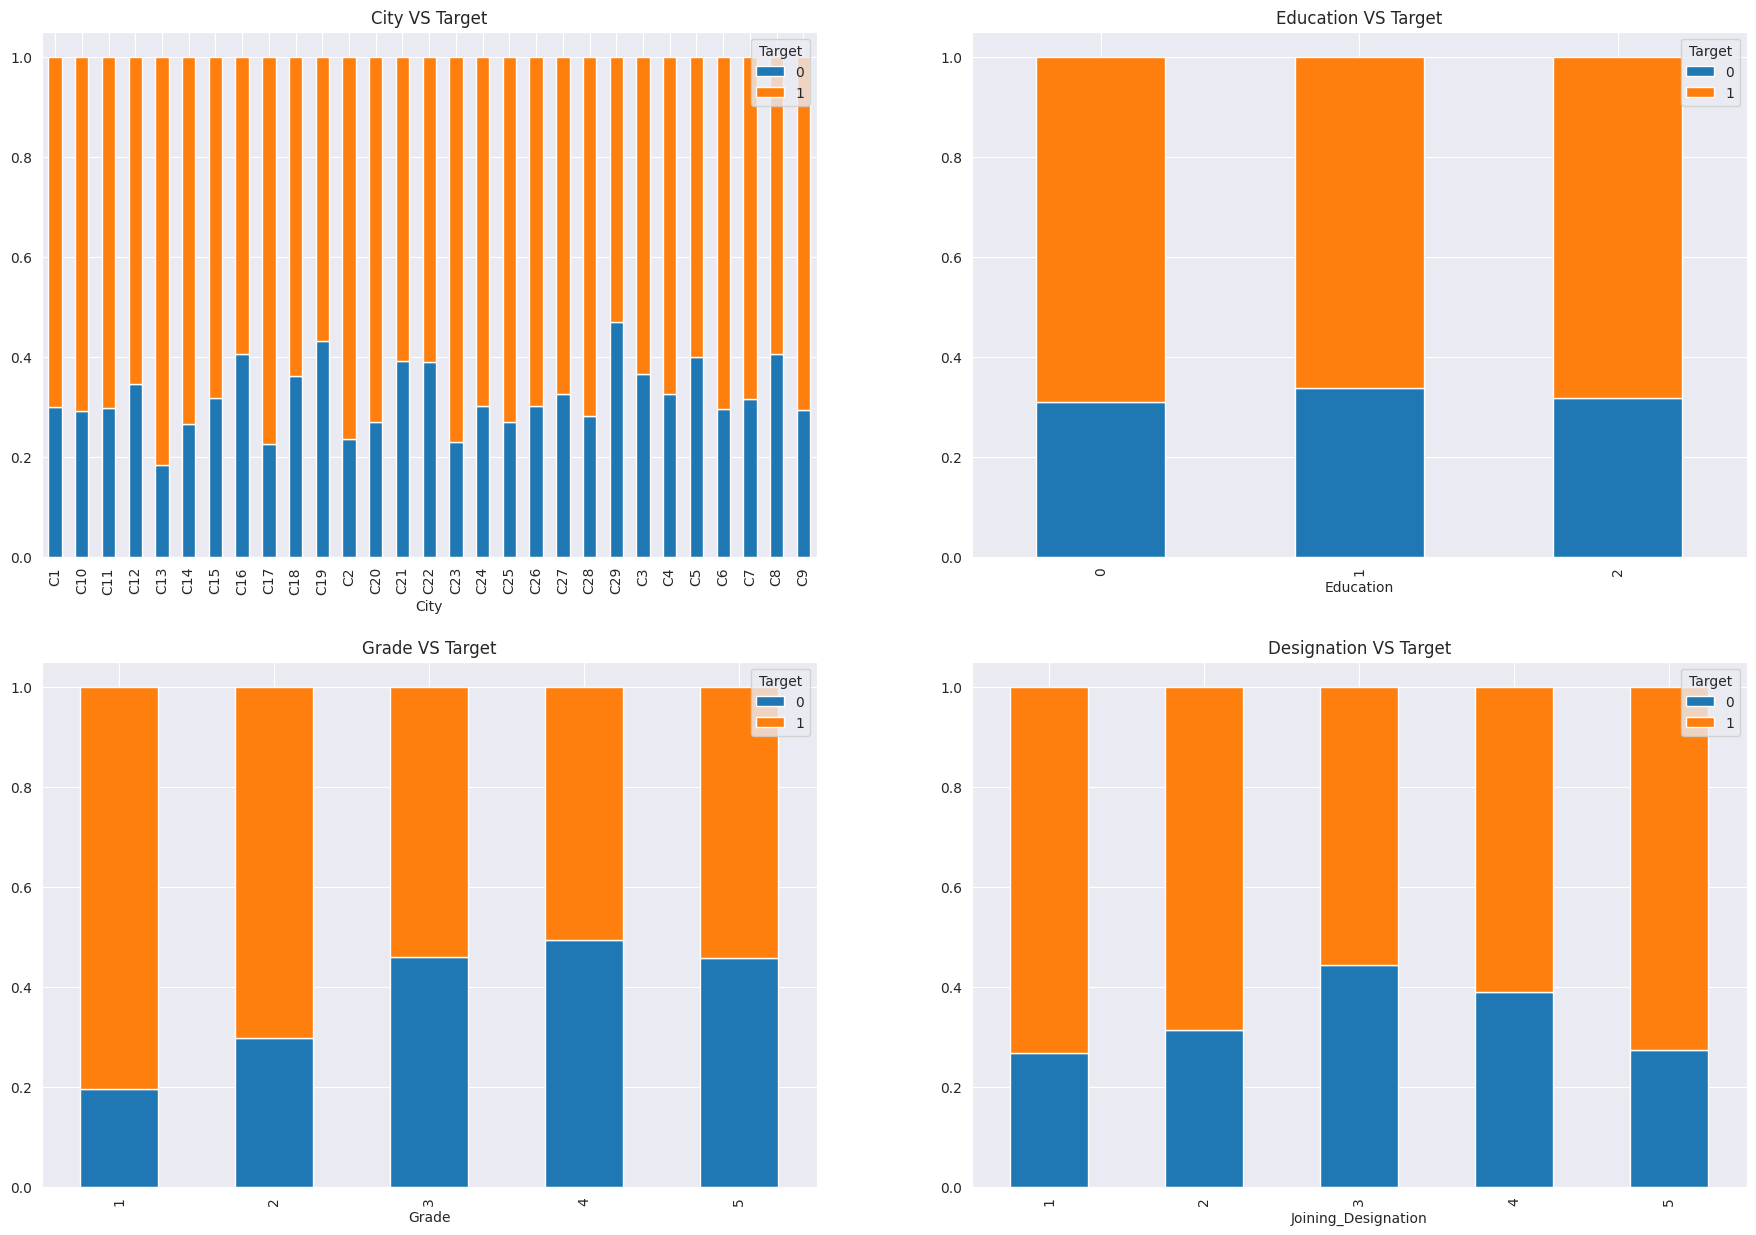

In [51]:
figure, axes=plt.subplots(2,2,figsize=(22,15))

#City
city=pd.crosstab(data['City'],data['Target'])
city.div(city.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[0,0],title='City VS Target')

#Education
education=pd.crosstab(data['Education'],data['Target'])
education.div(education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[0,1],title='Education VS Target')

#Grade
grade=pd.crosstab(data['Grade'],data['Target'])
grade.div(grade.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[1,0],title='Grade VS Target')

#Designation
designation=pd.crosstab(data['Joining_Designation'],data['Target'])
designation.div(designation.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[1,1],title='Designation VS Target')

plt.show()

**Insights**
- Employees in lower grades (Grade 1 & 2) are more likely to churn.
- Employees in certain designations (1, 2 & 5) have a 75% likelihood of churning.
- Regardless of education level, 75% of employees are likely to churn.


### Heatmap and Correlation

In [52]:
num_cols=data.select_dtypes(include='number').columns
num_cols

Index(['Driver_ID', 'Age', 'Gender', 'Education', 'Income',
       'Joining_Designation', 'Grade', 'Total_Business_Value',
       'Last_Quarterly_Rating', 'Quarterly_Rating_Increased',
       'Income_Increased', 'Target'],
      dtype='object')

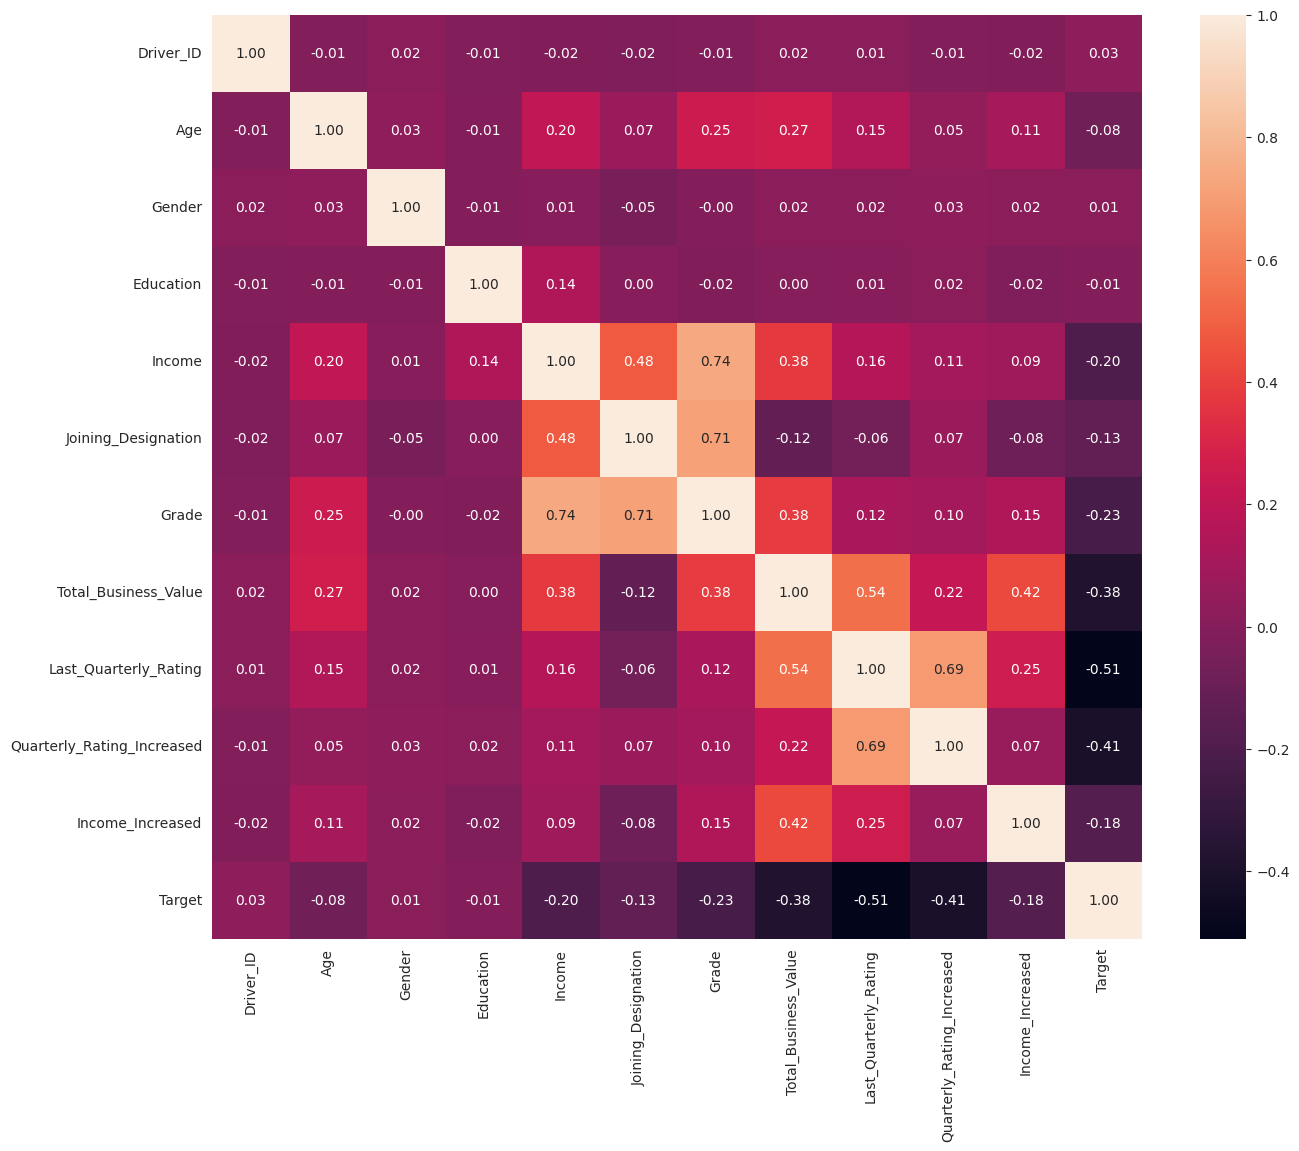

In [53]:
plt.figure(figsize=(15,12))
sns.heatmap(data[num_cols].corr(),annot=True,cmap='rocket',fmt='.2f')
plt.show()

# Data Preparation

## Categorical Features Encoding

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Driver_ID                   2381 non-null   int64  
 1   Age                         2381 non-null   float64
 2   Gender                      2381 non-null   float64
 3   City                        2381 non-null   object 
 4   Education                   2381 non-null   int64  
 5   Income                      2381 non-null   int64  
 6   Joining_Designation         2381 non-null   int64  
 7   Grade                       2381 non-null   int64  
 8   Total_Business_Value        2381 non-null   int64  
 9   Last_Quarterly_Rating       2381 non-null   int64  
 10  Quarterly_Rating_Increased  2381 non-null   int64  
 11  Income_Increased            2381 non-null   int64  
 12  Target                      2381 non-null   int64  
dtypes: float64(2), int64(10), object(

**Inference**:

The 'City' column is categorical, so we need to use one-hot encoding to convert it into numerical values for machine learning models.

**Applying One Hot Encoding on the 'City' column**

In [55]:
df1=pd.concat([df1,pd.get_dummies(df1['City'],prefix='City',dtype='int')],axis=1)
df1


,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,1,28.0,0.0,C23,2,57387,1,1,1715580,2,...,0,0,0,0,0,0,0,0,0,0
1,2,31.0,0.0,C7,2,67016,2,2,0,1,...,0,0,0,0,0,0,0,1,0,0
2,4,43.0,0.0,C13,2,65603,2,2,350000,1,...,0,0,0,0,0,0,0,0,0,0
3,5,29.0,0.0,C9,0,46368,1,1,120360,1,...,0,0,0,0,0,0,0,0,0,1
4,6,31.0,1.0,C11,1,78728,3,3,1265000,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,34.0,0.0,C24,0,82815,2,3,21748820,4,...,0,0,0,0,0,0,0,0,0,0
2377,2785,34.0,1.0,C9,0,12105,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2378,2786,45.0,0.0,C19,0,35370,2,2,2815090,1,...,0,0,0,0,0,0,0,0,0,0
2379,2787,28.0,1.0,C20,2,69498,1,1,977830,1,...,0,0,0,0,0,0,0,0,0,0


## Train Test Split

In [56]:
X=df1.drop(['Driver_ID','City','Target'],axis=1)
y=df1['Target']

In [57]:
X

,Age,Gender,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Income_Increased,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,28.0,0.0,2,57387,1,1,1715580,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,31.0,0.0,2,67016,2,2,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,43.0,0.0,2,65603,2,2,350000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,29.0,0.0,0,46368,1,1,120360,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,31.0,1.0,1,78728,3,3,1265000,2,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,34.0,0.0,0,82815,2,3,21748820,4,1,0,...,0,0,0,0,0,0,0,0,0,0
2377,34.0,1.0,0,12105,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2378,45.0,0.0,0,35370,2,2,2815090,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2379,28.0,1.0,2,69498,1,1,977830,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
y

,Target
0,1
1,0
2,1
3,1
4,0
...,...
2376,0
2377,1
2378,1
2379,1


In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [60]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1904, 39), (477, 39), (1904,), (477,))

## Feature Scaling

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)

In [62]:
X_train_scaled

,Age,Gender,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Income_Increased,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,0.205882,0.0,0.0,0.434089,0.50,0.50,0.014326,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.382353,0.0,0.0,0.156874,0.25,0.25,0.019146,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.176471,0.0,0.0,0.238407,0.00,0.25,0.014326,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.264706,1.0,1.0,0.132194,0.00,0.00,0.050401,0.333333,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.764706,0.0,0.0,0.448790,0.00,0.50,0.245810,0.666667,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1899,0.176471,0.0,0.5,0.296362,0.25,0.25,0.014326,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1900,0.147059,1.0,0.5,0.236628,0.00,0.00,0.027017,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1901,0.529412,1.0,0.5,0.037969,0.00,0.00,0.019272,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1902,0.294118,0.0,0.5,0.116249,0.00,0.00,0.014326,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
X_test_scaled

,Age,Gender,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Income_Increased,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,0.388889,0.0,1.0,0.332314,0.25,0.25,0.001446,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.138889,1.0,1.0,0.454633,0.00,0.50,0.022102,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.194444,0.0,0.5,0.315247,0.25,0.25,0.001446,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.351901,0.0,1.0,0.138409,0.00,0.00,0.001446,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.361111,0.0,1.0,0.197893,0.00,0.00,0.006448,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,0.694444,0.0,0.5,0.137020,0.00,0.50,0.216352,0.666667,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
473,0.361111,0.0,0.0,0.409256,0.25,0.25,0.001446,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
474,0.194444,0.0,0.0,0.058622,0.00,0.00,0.004468,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
475,0.361111,0.0,0.0,0.540006,0.50,0.50,0.037937,0.666667,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Class Imbalance Treatment

In [64]:
df1['Target'].value_counts(normalize=True)

,proportion
Target,
1,0.678706
0,0.321294


**Inference**

Here we can clearly see that the number of data points belonging to class 0 is 32%, which is less compared to class 1, indicating a potential imbalance in the dataset. Therefore, we need to use an oversampling technique to address this imbalance.

In [65]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=42)
X_sm,y_sm=smote.fit_resample(X_train_scaled,y_train)
y_sm.value_counts()

,count
Target,
0,1289
1,1289


In [66]:
X_sm

,Age,Gender,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Income_Increased,...,City_C27,City_C28,City_C29,City_C3,City_C4,City_C5,City_C6,City_C7,City_C8,City_C9
0,0.205882,0.000000,0.000000,0.434089,0.500000,0.500000,0.014326,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.382353,0.000000,0.000000,0.156874,0.250000,0.250000,0.019146,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.176471,0.000000,0.000000,0.238407,0.000000,0.250000,0.014326,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.264706,1.000000,1.000000,0.132194,0.000000,0.000000,0.050401,0.333333,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.764706,0.000000,0.000000,0.448790,0.000000,0.500000,0.245810,0.666667,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2573,0.481932,1.000000,0.686344,0.433520,0.093172,0.406828,0.252540,0.751541,0.0,0.627311,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2574,0.436979,0.259754,0.500000,0.583860,0.370123,0.500000,0.134943,0.913415,1.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2575,0.336672,0.276580,0.500000,0.413023,0.430855,0.430855,0.064251,0.333333,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2576,0.426834,1.000000,0.747938,0.276485,0.500000,0.500000,0.019977,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Ensemble Learning Techniques

## Bagging - Random Forest

### Model Building

**Hyperparameter Tuning using the GridSearchCV**

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time
params={'max_depth':[2,3,4,5],'n_estimators':[50,100,150,200]}
random_forest=RandomForestClassifier(random_state=42,class_weight='balanced_subsample')
start_time=time.time()
# Using Grid search to find best parameters
Grid_Search=GridSearchCV(random_forest,params,scoring='accuracy',cv=3,n_jobs=-1)
Grid_Search.fit(X_sm,y_sm)
end_time=time.time()
print(f'Best Parameters are :{Grid_Search.best_params_}')
print(f'Best Score:{Grid_Search.best_score_}')
print(f'Time Taken:{start_time-end_time:.3f} seconds')


Best Parameters are :{'max_depth': 5, 'n_estimators': 200}
Best Score:0.8118774309409714
Time Taken:-24.592 seconds


**Model Building using the Best parameters**

In [68]:
random_forest_clf=RandomForestClassifier(max_depth=5,n_estimators=200,random_state=42,class_weight='balanced_subsample')
random_forest_clf.fit(X_sm,y_sm)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=5,
                       n_estimators=200, random_state=42)

### Model Evaluation

**Predicting new or unseen data**

In [69]:
y_pred=random_forest_clf.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,

**Classification Metrics**

In [70]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print(f'Accuracy of Random Forest Classifier:{accuracy_score(y_test,y_pred)}')
print(f'Precision of Random Forest Classifier:{precision_score(y_test,y_pred)}')
print(f'Recall of Random Forest Classifier:{recall_score(y_test,y_pred)}')
print(f'F1 Score of Random Forest Classifier:{f1_score(y_test,y_pred)}')

Accuracy of Random Forest Classifier:0.8029350104821803
Precision of Random Forest Classifier:0.828169014084507
Recall of Random Forest Classifier:0.8990825688073395
F1 Score of Random Forest Classifier:0.8621700879765396


**Inference**:

- Accuracy of the Random Forest Classifier is 80.29%
- Precision ofthe  Random Forest Classifier is 82.81 %
- Recall of the Random Forest Classifier is 89.90%
- F1 score of the Random Forest Classifier is 86.21%

**Confusion Matrix**

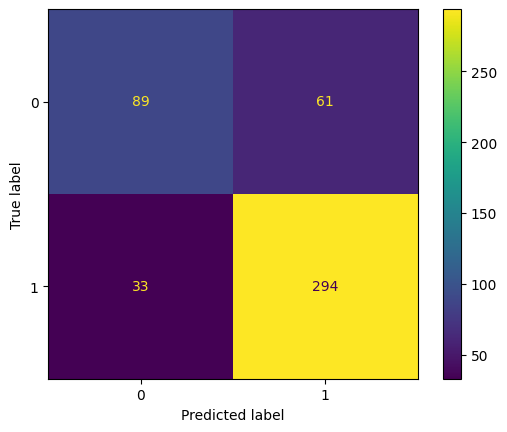

In [71]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
sns.reset_orig()
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=random_forest_clf.classes_)
disp.plot()

**Classification Report**

In [72]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.59      0.65       150
           1       0.83      0.90      0.86       327

    accuracy                           0.80       477
   macro avg       0.78      0.75      0.76       477
weighted avg       0.80      0.80      0.80       477



**Inference**:
- class 0: "Not churn" , class 1: "Churn"

- **Precision**:
  - Precision for class 0 is 0.73, which suggests that out of all the drivers the model predicted as "not churn," 73% of them truly did not churn. The remaining 27% of the predictions were false positives, meaning they were incorrectly predicted as "not churn" when they actually churned.
  - Precision for class 1 is 0.83, which suggests that out of all the drivers the model predicted as "churn," 83% of them truly did churn. The remaining 17% of the predictions were false positives, meaning they were incorrectly predicted as "churn" when they actually did not churn.
-**Recall**:
  - Recall for class 0 is 0.59, which suggests that out of all the drivers who truly did not churn, the model correctly identified 59% of them as "not churn." The remaining 41% were false negatives, meaning they were incorrectly predicted as "churn" when they actually did not churn.
  - Recall for class 1 is 0.90, which suggests that out of all the drivers who truly churned, the model correctly identified 90% of them as "churn." The remaining 10% were false negatives, meaning they were incorrectly predicted as "not churn" when they actually did churn.
- **F1 score**:
  -  f1 score of 0.65 means that the model has moderate performance in identifying drivers who did not churn, balancing both the precision and recall for this class.
  -  f1 score of 0.86 for class 1 suggests a strong balance between precision and recall for the "churn" class. This high F1 score indicates that the model performs well in identifying drivers who churn.
  
- **Accuracy**
  - An accuracy of 0.80 (80%) for the random forest classifier indicates that the model correctly predicts the churn status (whether a driver churns or not) 80% of the time. This means that out of all predictions made by the model, 80% of them match the actual outcomes.



## Boosting

### Gradient Boosted Decision Trees (GBDT)

#### Model Building

**Hyperparameter Tuning using the Grid Search CV**

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import time

params={
    "n_estimators":[50,100,150,200],
    "max_depth":[2,3,4],
    "learning_rate":[0.1,0.2,0.3],
    "subsample":[0.6,0.8,1.0],
}

gbdt=GradientBoostingClassifier(random_state=42)
start=time.time()

# Using Grid search to find best parameters
Grid_Search=GridSearchCV(gbdt,params,scoring='accuracy',cv=3,n_jobs=-1)
Grid_Search.fit(X_sm,y_sm)
end=time.time()

print(f'Best Parameters are :{Grid_Search.best_params_}')
print(f'Best Score:{Grid_Search.best_score_}')
print(f'Time Taken:{end-start:.3f} seconds')


Best Parameters are :{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.6}
Best Score:0.8293553889054336
Time Taken:145.750 seconds


**Model Building using the best parameters**

In [74]:
gbdt_clf=GradientBoostingClassifier(learning_rate=0.1,max_depth=4,n_estimators=100,subsample=0.6,random_state=42)
gbdt_clf.fit(X_sm,y_sm)

GradientBoostingClassifier(max_depth=4, random_state=42, subsample=0.6)

#### Model Evaluation

**Predicting new or unseen data**

In [75]:
y_pred = gbdt_clf.predict(X_test_scaled)
y_pred

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,

**Classification Metrics**

In [76]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print(f'Accuracy of Gradient Boosting Classifier :  {accuracy_score(y_test,y_pred)}')
print(f'Precision of Gradient Boosting Classifier : {precision_score(y_test,y_pred)}')
print(f'Recall of Gradient Boosting Classifier : {recall_score(y_test,y_pred)}')
print(f'F1 Score of Gradient Boosting Classifier : {f1_score(y_test,y_pred)}')

Accuracy of Gradient Boosting Classifier :  0.7861635220125787
Precision of Gradient Boosting Classifier : 0.831858407079646
Recall of Gradient Boosting Classifier : 0.8623853211009175
F1 Score of Gradient Boosting Classifier : 0.8468468468468469


**Inference**:

- Accuracy of the Gradient Boosting Classifier is 77.98%
- Precision ofthe  Gradient Boosting Classifier is 82.84%
- Recall of the Gradient Boosting Classifier is 85.62%
- F1 score of the Gradient Boosting Classifier is 84.21%

**Confusion Matrix**

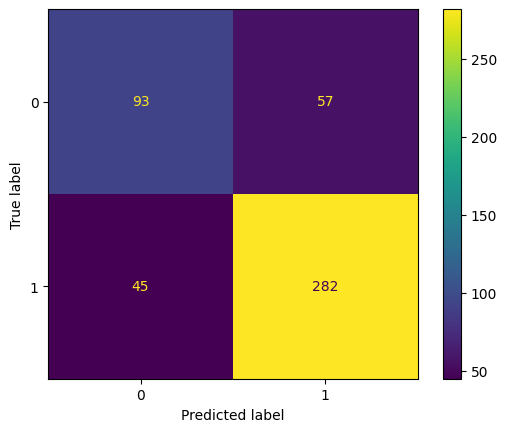

In [77]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
sns.reset_orig()
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gbdt_clf.classes_)
disp.plot()

**Classification Report**

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.62      0.65       150
           1       0.83      0.86      0.85       327

    accuracy                           0.79       477
   macro avg       0.75      0.74      0.75       477
weighted avg       0.78      0.79      0.78       477



**Inference**:
- class 0: "Not churn" , class 1: "Churn"

- **Precision**:
  - Precision for class 0 is 0.66, which suggests that out of all the drivers the model predicted as "not churn," 66% of them truly did not churn. The remaining 34% of the predictions were false positives, meaning they were incorrectly predicted as "not churn" when they actually churned.
  - Precision for class 1 is 0.83, which suggests that out of all the drivers the model predicted as "churn," 83% of them truly did churn. The remaining 17% of the predictions were false positives, meaning they were incorrectly predicted as "churn" when they actually did not churn.
-**Recall**:
  - Recall for class 0 is 0.61, which suggests that out of all the drivers who truly did not churn, the model correctly identified 61 % of them as "not churn." The remaining 39% were false negatives, meaning they were incorrectly predicted as "churn" when they actually did not churn.
  - Recall for class 1 is 0.86, which suggests that out of all the drivers who truly churned, the model correctly identified 86% of them as "churn." The remaining 14% were false negatives, meaning they were incorrectly predicted as "not churn" when they actually did churn.
- **F1 score**:
  -  f1 score of 0.64 means that the model has moderate performance in identifying drivers who did not churn, balancing both the precision and recall for this class.
  -  f1 score of 0.84 for class 1 suggests a strong balance between precision and recall for the "churn" class. This high F1 score indicates that the model performs well in identifying drivers who churn.
  
- **Accuracy**
  - An accuracy of 0.78 (78%) for the gradient boosting classifier indicates that the model correctly predicts the churn status (whether a driver churns or not) 78% of the time. This means that out of all predictions made by the model, 78% of them match the actual outcomes.



### XGBoost

#### Model Building

**Hyperparameter Tuning using the Grid Search CV**

In [79]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import time

params={
    "n_estimators":[50,100,150,200],
    "max_depth":[2,3,4],
    "learning_rate":[0.1,0.2,0.3],
    "subsample":[0.6,0.8,1.0],
    "colsample_bytree":[0.6,0.8,1.0]
}
xgb=XGBClassifier(class_weight='Balanced')
start=time.time()

# Using Grid search to find best parameters
Grid_Search=GridSearchCV(xgb,params,scoring='accuracy',cv=3,n_jobs=-1)
Grid_Search.fit(X_sm,y_sm)
end=time.time()

print(f'Best Parameters are :{Grid_Search.best_params_}')
print(f'Best Score:{Grid_Search.best_score_}')
print(f'Time Taken:{end-start:.3f} seconds')





Best Parameters are :{'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200, 'subsample': 0.6}
Best Score:0.8316823239570078
Time Taken:110.002 seconds


**Training the model using the best parameters**

In [80]:
xgb_clf= XGBClassifier(colsample_bytree=0.8,learning_rate=0.1,max_depth=3,n_estimators=150,subsample=0.6,class_weight='Balanced')
xgb_clf.fit(X_sm,y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='Balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.8, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, ...)

#### Model Evaluation

**Predicting new or unseen data**

In [81]:
y_pred=xgb_clf.predict(X_test_scaled)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,

**Classification Metrics**

In [82]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
print(f'Accuracy of XGBoost Classifier : {accuracy_score(y_test,y_pred)}')
print(f'Precision of XGBoost Classifier : {precision_score(y_test,y_pred)}')
print(f'Recall of XGBoost Classifier : {recall_score(y_test,y_pred)}')
print(f'F1 Score of XGBoost Classifier : {f1_score(y_test,y_pred)}')

Accuracy of XGBoost Classifier : 0.7861635220125787
Precision of XGBoost Classifier : 0.8223495702005731
Recall of XGBoost Classifier : 0.8776758409785933
F1 Score of XGBoost Classifier : 0.849112426035503


**Inference**:

- Accuracy of the XGBoost Classifier is 78.19%
- Precision ofthe  XGBoost Classifier is 82.31 %
- Recall of the XGBoost Classifier is 86.85%
- F1 score of the XGBoost Classifier is 84.52%

**Confusion Matrix**

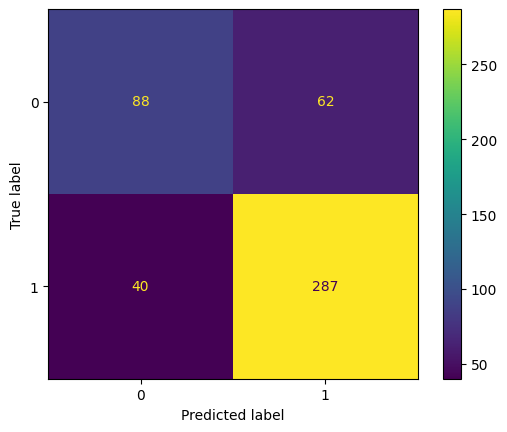

In [83]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
sns.reset_orig()
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb_clf.classes_)
disp.plot()

**Classification Report**

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.59      0.63       150
           1       0.82      0.88      0.85       327

    accuracy                           0.79       477
   macro avg       0.75      0.73      0.74       477
weighted avg       0.78      0.79      0.78       477



**Inference**:
- class 0: "Not churn" , class 1: "Churn"

- **Precision**:
  - Precision for class 0 is 0.67, which suggests that out of all the drivers the model predicted as "not churn," 67% of them truly did not churn. The remaining 33% of the predictions were false positives, meaning they were incorrectly predicted as "not churn" when they actually churned.
  - Precision for class 1 is 0.81, which suggests that out of all the drivers the model predicted as "churn," 81% of them truly did churn. The remaining 18% of the predictions were false positives, meaning they were incorrectly predicted as "churn" when they actually did not churn.

- **Recall**:
  - Recall for class 0 is 0.59, which suggests that out of all the drivers who truly did not churn, the model correctly identified 59% of them as "not churn." The remaining 41% were false negatives, meaning they were incorrectly predicted as "churn" when they actually did not churn.
  - Recall for class 1 is 0.87, which suggests that out of all the drivers who truly churned, the model correctly identified 87% of them as "churn." The remaining 13% were false negatives, meaning they were incorrectly predicted as "not churn" when they actually did churn.
  
- **F1 score**:
  -  f1 score of 0.63 means that the model has moderate performance in identifying drivers who did not churn, balancing both the precision and recall for this class.
  -  f1 score of 0.85 for class 1 suggests a strong balance between precision and recall for the "churn" class. This high F1 score indicates that the model performs well in identifying drivers who churn.
  
- **Accuracy**
  - An accuracy of 0.78 (78%) for the gradient boosting classifier indicates that the model correctly predicts the churn status (whether a driver churns or not) 78% of the time. This means that out of all predictions made by the model, 78% of them match the actual outcomes.



## Comparing models using the ROC-AUC Curve

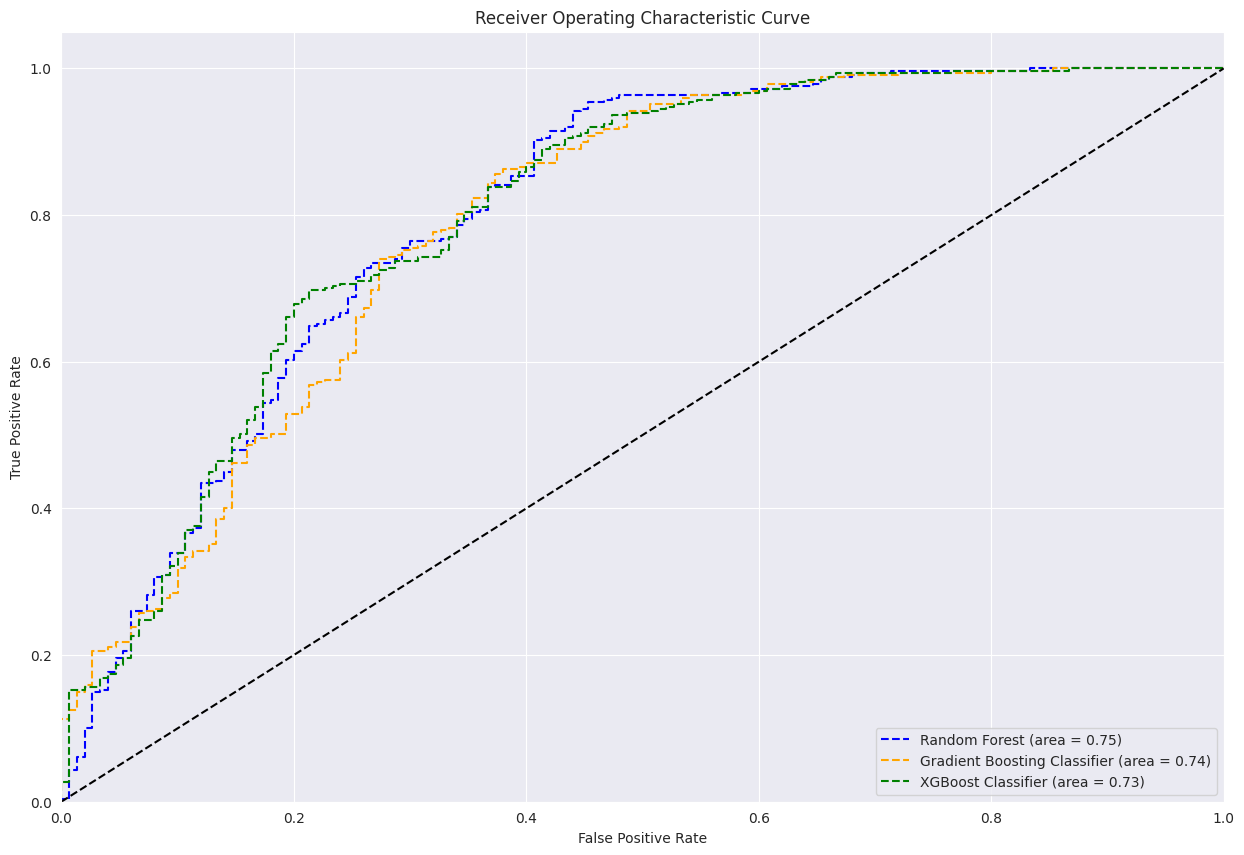

In [85]:
from sklearn.metrics import roc_curve,roc_auc_score

y_pred_rf=random_forest_clf.predict(X_test_scaled)
y_pred_gbdt=gbdt_clf.predict(X_test_scaled)
y_pred_xgb=xgb_clf.predict(X_test_scaled)
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))

#ROC-Curve

#ROC-Curve for the Random forest Classifier
rf_roc_auc=roc_auc_score(y_test,y_pred_rf)
fpr1,tpr1,thresholds1=roc_curve(y_test,random_forest_clf.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr1,tpr1,linestyle='--', color='blue',label='Random Forest (area = %0.2f)' % rf_roc_auc)

#ROC-Curve for the Gradient Boosting Classifer
gbdt_roc_auc=roc_auc_score(y_test,y_pred_gbdt)
fpr2,tpr2,thresholds2=roc_curve(y_test,gbdt_clf.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr2,tpr2,linestyle='--', color='orange',label='Gradient Boosting Classifier (area = %0.2f)' % gbdt_roc_auc)

#ROC-Curve for the XGBoost Classifier
xgb_roc_auc=roc_auc_score(y_test,y_pred_xgb)
fpr3,tpr3,thresholds3=roc_curve(y_test,xgb_clf.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr3,tpr3,linestyle='--', color='green',label='XGBoost Classifier (area = %0.2f)' % xgb_roc_auc)

plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')

plt.show()

**Inference**:
- AUC for Random Forest = 0.75
- AUC for GBDT = 0.73
- AUC for XGBoost = 0.73
- Random Forest Classifier has the highest area under the ROC curve (AUC) at 0.75, which is greater than that of GBDT and XGBoost. This makes Random Forest the best classifier among the trained models.

## Result Analysis

**Final Result Evaluation**

* We observe that we are not getting very high recall on target 0 which may be due to small unbalanced dataset.
* Higher precision means that an algorithm returns more relevant results than irrelevant ones, and high recall means that an algorithm returns most of the relevant results (whether or not irrelevant ones are also returned).

**We observe that Random Forest outperforms rest of the models and has higher recall and precision values**:
- **Precision**
  - For class 0 is 73%.
  - For class 1 is 83%.
- **Recall**
  - For class 0 is 59%.
  - For class 1 is 90%.

- Area under ROC curve is 0.75.

**Gradient Boosting Classifier Result**:

 - **Precision**
  - For class 0 is 66%.
  - For class 1 is 83%.

- **Recall**
  - For class 0 is 61%.
  - For class 1 is 86%.

- Area under ROC curve is 0.73.


**XGBoost Classifier Result**:

 - **Precision**
  - For class 0 is 67%.
  - For class 1 is 82%.

- **Recall**
  - For class 0 is 59%.
  - For class 1 is 87%.

- Area under ROC curve is 0.73.

## Feature Importance for the Best Model

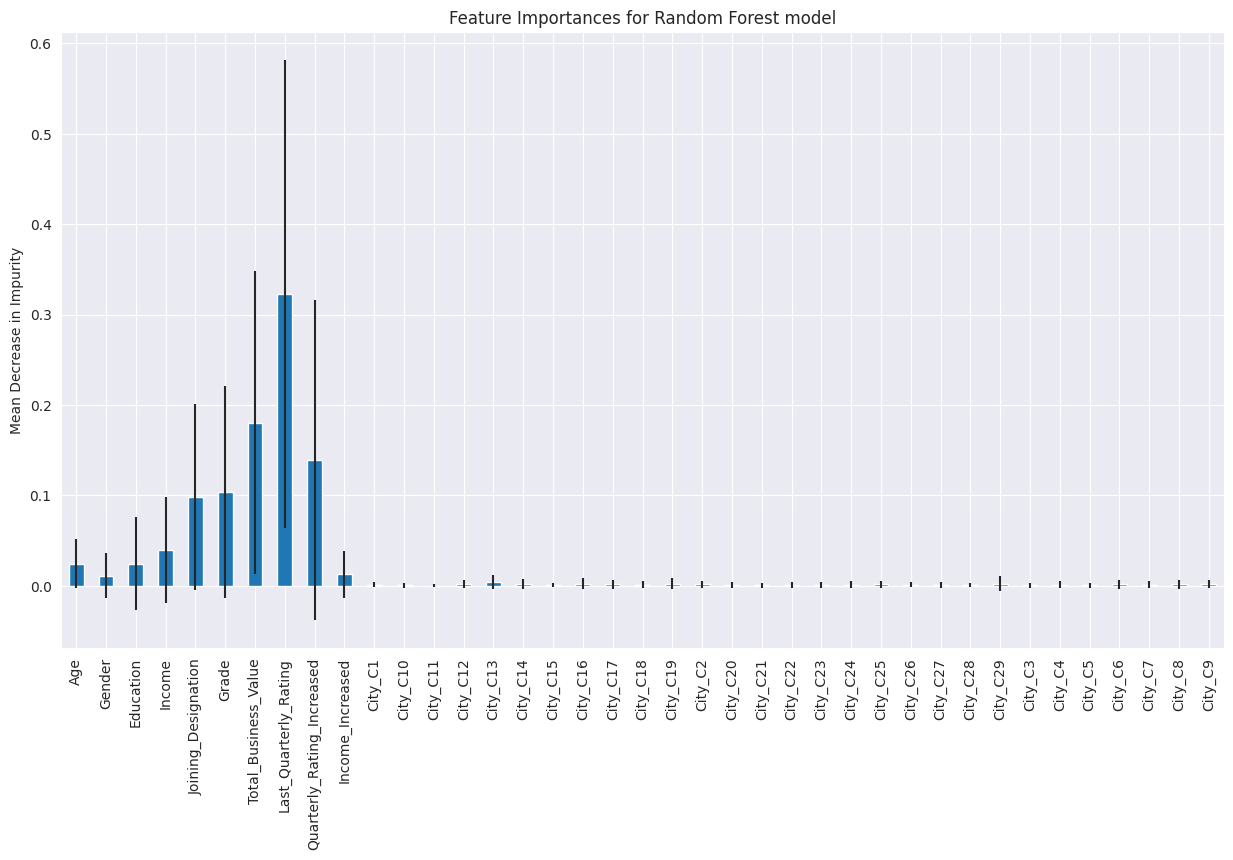

In [86]:
feature_importances=pd.Series(random_forest_clf.feature_importances_, index=X_sm.columns)
std=np.std([tree.feature_importances_ for tree in random_forest_clf.estimators_],axis=0)
plt.figure(figsize=(15,8))
feature_importances.plot.bar(yerr=std)
plt.title('Feature Importances for Random Forest model')
plt.ylabel('Mean Decrease in Impurity')
plt.show()

**Inference:**

"Last_Quarterly_Rating" is the most important feature in the Random Forest model due to its highest mean decrease in impurity, making it the most influential feature for accurate predictions.








# Insights

- 68% of the employees have left the organization.
- 32% of the employees are still part of the organization.
- 59% of the employees are male, while 41% are female.
- Approximately 65.2% of the employees fall within the young age group (21-35 years), while 34% belong to the middle-aged group (36-50 years). A smaller proportion, 0.84%, comprises older employees aged 51-65 years.
- 43.2% of employees have an income between 40,000 and 69,999.
- 26.5% of employees have an income between 10,000 and 39,999.
- 20.6% of employees have an income between 70,000 and 99,999.
- 7.39% of employees have an income between 100,000 and 129,999.
- Approximately 2.2% of employees have an income greater than 160,000.
- Only 1.81% of employees received a salary hike, while 98.2% did not experience any increase in salary. This lack of increments could be a significant factor contributing to employees leaving the company.
- 85% of employees did not receive any increase in their quarterly ratings, while 15% experienced an increase in their quarterly ratings.
- Approximately 6.4% of employees are from city C20, while 4.2% are from city C15.
- The proportion of employees who have completed 12th grade and those who have graduated is the same.
- 36% of employees belong to grade 2, 31.1% belong to grade 1, 26.2% belong to grade 3, and the remaining employees belong to grades 4 and 5.
- 43.1% of employees joined at designation 1, 34.2% at designation 2, 20.7% at designation 3, and the remaining employees at designations 4 and 5.
- 32.5% of male employees are still working, while 67.5% have left the company.
- 31.4% of female employees have not churned, whereas 68.5% have been churned
- For the 21-35 age group, 29.6% of employees have not churned, while 70.4% have left the company.
- Among employees aged 36-50, 37% are still with the company, whereas 63% have churned.
- In the 51-65 age group, 30% of employees remain loyal and continue to work, while 70% have already churned.
- Employees earning between 10k - 39k are highly likely to churn, with 79% having left the company, while only 21% are still working.
- For those with a salary between 40k - 70k, there is a 70% chance they will leave the company, with only 30% remaining.
- Among employees earning 70k - 129,999, 56% have churned, while 44% are still employed.
= In the salary range of 130k - 160k, 44% of employees have left, whereas 56% continue to work.
- Employees with salaries above 160k are less likely to churn, with only 33% having left the company and the remaining 67% still working.
- Employees with Salary Hikes:
  - 93% of employees who received a salary hike have not churned.
  - Only 7% of employees with a salary hike have left the company.

- Employees without Salary Increases:
  - 68% of employees who did not receive a salary increase have churned.
  - 31% of employees without a salary increase remain with the company.

- Employees with an Increase in Quarterly Rating:
    - 77% are not churned.
    - 23% are churned.

- Employees without an Increase in Quarterly Rating:
  - 24% are not churned.
  - 75% are churned.

- Low Business Value: 69% of employees with low business value are likely to leave the organization, while 30% will continue working.
- Medium Business Value: 89% of employees with medium business value will remain with the organization, whereas 11% are likely to leave.
- High Business Value: All employees with high business value are expected to stay with the organization.
- Employees in lower grades (Grade 1 & 2) are more likely to churn.
- Employees in certain designations (1, 2 & 5) have a 75% likelihood of churning.
- Regardless of education level, 75% of employees are likely to churn.

# Recommendations

**Actionable Insight: Data indicates that the highest churn rates are seen in the 21-35 and 51-65 age groups, both with 70% of employees having left the company.**

**Recommendations**:
- **Targeted Retention Programs:** Implement retention initiatives tailored to the needs of drivers in these age groups. For younger drivers (21-35), focus on career growth opportunities, financial incentives, and work-life balance. For older drivers (51-65), consider health benefits, flexible work hours, and retirement planning assistance.

- **Regular Feedback Mechanisms:** Establish feedback channels to understand the specific concerns of drivers in these age groups. This can help in identifying and addressing issues before they lead to churn.

- **Customized Training Programs:** Offer training and development programs that cater to the distinct needs of these age groups. For example, younger drivers may benefit from advanced driving skills or customer service training, while older drivers might appreciate refresher courses on new technology.

- **Health and Wellness Initiatives:** Introduce health and wellness programs that address the physical and mental well-being of drivers, especially those in the 51-65 age group. This could include regular health check-ups, stress management workshops, and ergonomic support.

**Actionable Insight : Salary increases significantly reduce churn rates. Among employees who receive salary hikes, only 7% have left the company, indicating high retention. Conversely, employees who do not receive salary increases have a much higher churn rate of 68%, highlighting the importance of salary increments in maintaining employee loyalty and reducing turnover**.

**Recommendations :**

To reduce churn, consider implementing regular salary increments for drivers. This strategy has proven effective in retaining employees, as drivers who received salary increases showed significantly lower turnover rates. Prioritizing fair and timely compensation adjustments can enhance driver loyalty and reduce attrition.



**Actionable Insight : The data indicates a strong correlation between receiving an increase in quarterly rating and employee retention. Employees who received a quarterly rating increase are significantly more likely to stay with the organization compared to those who did not receive an increase.**

**Recommendation:**

To enhance employee retention, focus on recognizing and rewarding performance through quarterly rating increases. This approach is linked to higher retention rates, as employees who receive such recognition are more likely to remain with the organization. Prioritizing performance-based incentives can help reduce churn and retain top talent.



**Actionable Insight : Employees with higher business value are more likely to stay with the organization. As business value increases, the likelihood of churn decreases significantly, with no churn observed among employees with the highest business value. Conversely, employees with lower business value have a higher tendency to leave the organization.**

**Recommendation :**

To reduce churn, prioritize strategies that enhance employee engagement and contribution, particularly for those with lower business value. By increasing their involvement and value to the organization, the likelihood of churn decreases, improving overall retention rates.

